In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cv2
import random
from collections import Counter
import time
from datetime import datetime
import seaborn as sns
from sklearn.utils import check_random_state


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [2]:
import os

clear_sky_images = os.listdir("resources/cloud-images/cloud-classifier-1/clear_sky")
cloud_images = os.listdir("resources/cloud-images/cloud-classifier-1/cloud")

labeled_data = {}

# Fine to label the images like this for now because there are only 2 classes, but best to automate this step using folder names next

for i in clear_sky_images:
    labeled_data[i] =  [{'label': 'clear_sky'}]

for i in cloud_images:
    labeled_data[i] =  [{'label': 'cloud'}]

print(len(labeled_data))

698


In [ ]:
train_images = []
train_labels = []
class_object = ['clear_sky', 'cloud']

start_datetime = datetime.now()

for (i, image_file) in enumerate(labeled_data):
    #read image
    path = 'resources/cloud-images/cloud-classifier-1/'+ labeled_data[image_file][0]['label'] + '/' + image_file
    print(path)
    image = cv2.imread(path)
    #make images gray
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #label image using the annotations
    label = class_object.index(labeled_data[image_file][0]['label'])
    tmp_label = labeled_data[image_file][0]['label']
    # resize image
    image = cv2.resize(image, (32, 32))
    # flatten the image
    pixels = image
    #Append flattened image to
    train_images.append(pixels)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)
    plt.imshow(image)
    plt.show()

end_datetime = datetime.now()

In [75]:
print('Image Processing Duration: ' + str(end_datetime-start_datetime))

train_images = np.array(train_images)
train_labels = np.array(train_labels)


random_state = check_random_state(0)
permutation = random_state.permutation(train_images.shape[0])
train_images = train_images[permutation]
train_labels = train_labels[permutation]

train_images = train_images.reshape((train_images.shape[0], -1))

test_size = 0.3

train_samples, test_samples, train_samples_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=None)

print(train_labels.shape)

Image Processing Duration: 0:00:57.473588
(698,)


In [90]:
X_train = train_samples
X_test = test_samples

y_train, y_test = train_samples_labels, test_labels

clf = LogisticRegression(penalty="l1", solver="liblinear", tol=0.1)
clf.fit(X_train, y_train)


sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 0.20%
Test score with L1 penalty: 0.8190


/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


(1, 1024)


<Figure size 1000x500 with 0 Axes>

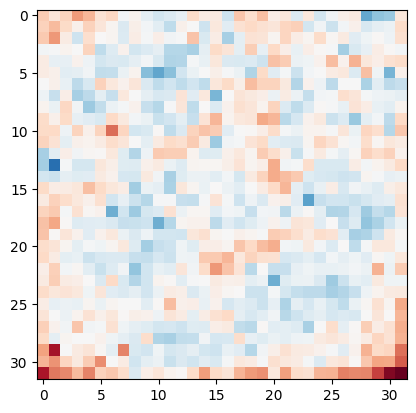

In [91]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()

print(coef.shape)

fig, ax = plt.subplots()


plt.imshow(
    coef[0].reshape(32, 32),
    interpolation="nearest",
    cmap=plt.cm.RdBu,
    vmin=-scale,
    vmax=scale,
)

plt.show()

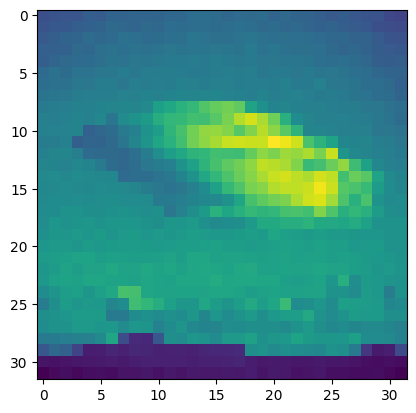

(1024,)


/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array([1])

In [94]:
#Test

image = cv2.imread("labs/test_image4.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (32, 32))
plt.imshow(image)
plt.show()

image = np.array(image)
image = image.flatten()
print(image.shape)

clf.predict([image])
